In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import files
#uploaded = files.upload()

D0_0 = 'posNewTouchedData/0,0.csv'
D0_7_5 = 'posNewTouchedData/0,7.5.csv'
D0_15 ='posNewTouchedData/0,15.csv'
D7_5_0 ='posNewTouchedData/7.5,0.csv'
D7_5_7_5 ='posNewTouchedData/7.5,7.5.csv'
D7_5_15 ='posNewTouchedData/7.5,15.csv'
D15_0 ='posNewTouchedData/15,0.csv'
D15_7_5 = 'posNewTouchedData/15,7.5.csv'
D15_15 = 'posNewTouchedData/15,15.csv'

# 51 datasets

#df1 = pd.read_csv(url)

# Importing the Boston Housing dataset
#from sklearn.datasets import load_boston

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        tf.debugging.set_log_device_placement(True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
        
"""print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

if not tf.test.gpu_device_name():
    print("not found")
else:
    print("device: {}".format(tf.test.gpu_device_name()))
    
tf.debugging.set_log_device_placement(True)"""
    

1 Physical GPUs, 1 Logical GPUs


'print("Num GPUs Available: ", len(tf.config.list_physical_devices(\'GPU\')))\n\nif not tf.test.gpu_device_name():\n    print("not found")\nelse:\n    print("device: {}".format(tf.test.gpu_device_name()))\n    \ntf.debugging.set_log_device_placement(True)'

In [54]:
def ChangetoMean(x, numD):
    NumDiv = numD
    d0_7_5Mean = np.empty((int(x.shape[0]/NumDiv),x.shape[1]))
    for i in range(int(x.shape[0]/NumDiv)):
        d0_7_5Mean[i,:] = np.mean(x.iloc[i*NumDiv:i*NumDiv+NumDiv,:],axis=0)
    return d0_7_5Mean

In [55]:
d0_0 = pd.read_csv(D0_0,header=None)
d0_7_5 = ChangetoMean(pd.read_csv(D0_7_5,header=None), 5)
d0_15 = pd.read_csv(D0_15,header=None)
d7_5_0 = pd.read_csv(D7_5_0,header=None)
d7_5_7_5 = pd.read_csv(D7_5_7_5,header=None)
d7_5_15 = pd.read_csv(D7_5_15,header=None)
d15_0 = pd.read_csv(D15_0,header=None)
d15_7_5 = pd.read_csv(D15_7_5,header=None)
d15_15 = pd.read_csv(D15_15,header=None)

In [64]:
d15_15.shape

(5000, 6)

In [65]:
datasRaw = np.concatenate([d0_0 ,d0_7_5 ,d0_15 ,d7_5_0 ,d7_5_7_5 ,d7_5_15 ,d15_0 , 
                           d15_7_5, d15_15])
datasRaw.shape  # 51*5000 = 255000

(45000, 6)

In [67]:
datasFull=pd.DataFrame.from_dict(datasRaw)
datasFull.columns=["F0","F1","F2","F3","x","y"]
datasFull.head()

,F0,F1,F2,F3,x,y
0,264.8,13.0,296.2,511.6,0.0,0.0
1,265.0,13.0,296.4,512.2,0.0,0.0
2,264.8,13.0,296.4,516.4,0.0,0.0
3,264.8,13.0,297.0,520.8,0.0,0.0
4,265.4,13.0,297.0,518.6,0.0,0.0


In [68]:
FullDescribe=datasFull.describe()
FullDescribe=FullDescribe.transpose()
MeandataFull=FullDescribe['mean']
StddataFull=FullDescribe['std']

In [69]:
print("Mean: {}\nStd: {}".format(MeandataFull,StddataFull))

Mean: F0    385.350284
F1    132.483951
F2    366.454000
F3    355.273467
x       7.500000
y       7.500000
Name: mean, dtype: float64
Std: F0    109.484312
F1    185.298980
F2    176.520386
F3    201.882096
x       6.123792
y       6.123792
Name: std, dtype: float64


In [70]:
dataTrain, dataTest = train_test_split(datasFull, test_size=0.1)
dataTrain, dataVal = train_test_split(dataTrain, test_size=0.2)

In [71]:
dataTrain.head()

,F0,F1,F2,F3,x,y
33672,277.8,16.0,796.0,225.0,15.0,0.0
33695,274.2,15.6,787.6,225.0,15.0,0.0
31054,304.8,17.0,858.6,226.0,15.0,0.0
34239,273.4,16.0,838.6,225.0,15.0,0.0
11808,611.0,12.0,204.4,223.0,0.0,15.0


In [72]:
# Helper functions
def norm(x):
    return (x - MeandataFull) / StddataFull

def norm4(x, meanD, stdD):
    return (x - meanD) / stdD

def norm2(x):
    return (x - train_stats['mean']) / train_stats['std']

def norm3(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    return (x - dataDescribe['mean']) / dataDescribe['std']

def format_output(data):
    data2=data
    y1 = data2.pop('x')    
    y2 = data2.pop('y')
    return y1, y2

def format_input(data):
    data2=data
    data2.pop('x')    
    data2.pop('y')
    return data2 

def format_output2(data):
    y1 = data.pop('x')   
    y1=np.array(y1)
    y2 = data.pop('y')
    y2=np.array(y2)
    return y1, y2

def PrintMeanStd(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    print("Mean: {}\nStd: {}".format(dataDescribe['mean'],dataDescribe['std']))
    


In [73]:
# Normalize the training and test data
norm_train_X = format_input(norm(dataTrain))
train_Y = format_output(dataTrain)

norm_test_X=format_input(norm(dataTest))
test_Y=format_output(dataTest)

norm_val_X = format_input(norm(dataVal))
val_Y = format_output(dataVal)

norm_train_X = np.array(norm_train_X)
#train_Y = np.array(train_Y)
norm_test_X = np.array(norm_test_X)
#test_Y = np.array(test_Y)
norm_val_X = np.array(norm_val_X)
#val_Y = np.array(val_Y)

In [78]:
len(norm_train_X[1])

4

In [75]:
def build_model():
    # Define model layers.
    input_layer = layers.Input(shape=(len(norm_train_X[1]),))
    x = layers.Dense(130)(input_layer)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    
    x = layers.Dense(130)(x)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    
    #x = layers.Dense(70)(x)
    #x = layers.BatchNormalization()(x)
    #x = tf.keras.activations.relu(x)
    
    third_dense = layers.Dense(units='130', activation='relu')(x)
    #third_dense=layers.Dropout(0.5)(third_dense)
    
    # Y1 output will be fed from the first dense
    y1_output = layers.Dense(units='1', name='x_output')(third_dense)
    
    # Y2 output will be fed from the second dense
    y2_output = layers.Dense(units='1', name='y_output')(third_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

    return model

In [79]:
model = build_model()

# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'x_output': 'mse', 'y_output': 'mse'},
              metrics={'x_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y_output': tf.keras.metrics.RootMeanSquaredError()})

In [81]:
# Train the model for 200 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=300, validation_data=(norm_test_X, test_Y))

Epoch 1/300
1013/1013 [==============================] - 14s 14ms/step - loss: 1.5794 - x_output_loss: 0.9178 - y_output_loss: 0.6616 - x_output_root_mean_squared_error: 0.9580 - y_output_root_mean_squared_error: 0.8134 - val_loss: 0.6685 - val_x_output_loss: 0.4088 - val_y_output_loss: 0.2597 - val_x_output_root_mean_squared_error: 0.6394 - val_y_output_root_mean_squared_error: 0.5096
Epoch 2/300
1013/1013 [==============================] - 14s 13ms/step - loss: 1.1546 - x_output_loss: 0.6965 - y_output_loss: 0.4581 - x_output_root_mean_squared_error: 0.8346 - y_output_root_mean_squared_error: 0.6768 - val_loss: 1.3337 - val_x_output_loss: 0.5742 - val_y_output_loss: 0.7595 - val_x_output_root_mean_squared_error: 0.7577 - val_y_output_root_mean_squared_error: 0.8715
Epoch 3/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.8978 - x_output_loss: 0.5741 - y_output_loss: 0.3237 - x_output_root_mean_squared_error: 0.7577 - y_output_root_mean_squared_error: 0.5689 - 

Epoch 22/300
1013/1013 [==============================] - 14s 13ms/step - loss: 0.3466 - x_output_loss: 0.2322 - y_output_loss: 0.1144 - x_output_root_mean_squared_error: 0.4819 - y_output_root_mean_squared_error: 0.3382 - val_loss: 0.2079 - val_x_output_loss: 0.1480 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.3847 - val_y_output_root_mean_squared_error: 0.2446
Epoch 23/300
1013/1013 [==============================] - 14s 13ms/step - loss: 0.3643 - x_output_loss: 0.2446 - y_output_loss: 0.1197 - x_output_root_mean_squared_error: 0.4946 - y_output_root_mean_squared_error: 0.3459 - val_loss: 0.1478 - val_x_output_loss: 0.0993 - val_y_output_loss: 0.0485 - val_x_output_root_mean_squared_error: 0.3152 - val_y_output_root_mean_squared_error: 0.2202
Epoch 24/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.3542 - x_output_loss: 0.2331 - y_output_loss: 0.1211 - x_output_root_mean_squared_error: 0.4828 - y_output_root_mean_squared_error: 0.3480

1013/1013 [==============================] - 15s 14ms/step - loss: 0.2850 - x_output_loss: 0.1904 - y_output_loss: 0.0946 - x_output_root_mean_squared_error: 0.4364 - y_output_root_mean_squared_error: 0.3075 - val_loss: 0.1412 - val_x_output_loss: 0.0982 - val_y_output_loss: 0.0430 - val_x_output_root_mean_squared_error: 0.3134 - val_y_output_root_mean_squared_error: 0.2073
Epoch 43/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.2960 - x_output_loss: 0.1992 - y_output_loss: 0.0968 - x_output_root_mean_squared_error: 0.4463 - y_output_root_mean_squared_error: 0.3111 - val_loss: 0.2279 - val_x_output_loss: 0.1452 - val_y_output_loss: 0.0828 - val_x_output_root_mean_squared_error: 0.3810 - val_y_output_root_mean_squared_error: 0.2877
Epoch 44/300
1013/1013 [==============================] - 16s 16ms/step - loss: 0.2942 - x_output_loss: 0.1966 - y_output_loss: 0.0976 - x_output_root_mean_squared_error: 0.4434 - y_output_root_mean_squared_error: 0.3124 - val_loss: 

1013/1013 [==============================] - 14s 13ms/step - loss: 0.2434 - x_output_loss: 0.1646 - y_output_loss: 0.0789 - x_output_root_mean_squared_error: 0.4057 - y_output_root_mean_squared_error: 0.2808 - val_loss: 0.3410 - val_x_output_loss: 0.1970 - val_y_output_loss: 0.1440 - val_x_output_root_mean_squared_error: 0.4438 - val_y_output_root_mean_squared_error: 0.3795
Epoch 62/300
1013/1013 [==============================] - 13s 13ms/step - loss: 0.2424 - x_output_loss: 0.1639 - y_output_loss: 0.0785 - x_output_root_mean_squared_error: 0.4048 - y_output_root_mean_squared_error: 0.2802 - val_loss: 0.1458 - val_x_output_loss: 0.1054 - val_y_output_loss: 0.0404 - val_x_output_root_mean_squared_error: 0.3247 - val_y_output_root_mean_squared_error: 0.2010
Epoch 63/300
1013/1013 [==============================] - 13s 13ms/step - loss: 0.2246 - x_output_loss: 0.1515 - y_output_loss: 0.0731 - x_output_root_mean_squared_error: 0.3893 - y_output_root_mean_squared_error: 0.2703 - val_loss: 

1013/1013 [==============================] - 14s 13ms/step - loss: 0.2057 - x_output_loss: 0.1368 - y_output_loss: 0.0688 - x_output_root_mean_squared_error: 0.3699 - y_output_root_mean_squared_error: 0.2623 - val_loss: 0.0982 - val_x_output_loss: 0.0724 - val_y_output_loss: 0.0257 - val_x_output_root_mean_squared_error: 0.2691 - val_y_output_root_mean_squared_error: 0.1604
Epoch 83/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.2149 - x_output_loss: 0.1437 - y_output_loss: 0.0712 - x_output_root_mean_squared_error: 0.3791 - y_output_root_mean_squared_error: 0.2668 - val_loss: 0.0963 - val_x_output_loss: 0.0665 - val_y_output_loss: 0.0298 - val_x_output_root_mean_squared_error: 0.2578 - val_y_output_root_mean_squared_error: 0.1726
Epoch 84/300
1013/1013 [==============================] - 13s 13ms/step - loss: 0.2001 - x_output_loss: 0.1338 - y_output_loss: 0.0663 - x_output_root_mean_squared_error: 0.3658 - y_output_root_mean_squared_error: 0.2574 - val_loss: 

1013/1013 [==============================] - 14s 13ms/step - loss: 0.1738 - x_output_loss: 0.1195 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.3457 - y_output_root_mean_squared_error: 0.2330 - val_loss: 0.0771 - val_x_output_loss: 0.0512 - val_y_output_loss: 0.0259 - val_x_output_root_mean_squared_error: 0.2262 - val_y_output_root_mean_squared_error: 0.160949 - y_
Epoch 104/300
1013/1013 [==============================] - 14s 13ms/step - loss: 0.1808 - x_output_loss: 0.1184 - y_output_loss: 0.0624 - x_output_root_mean_squared_error: 0.3441 - y_output_root_mean_squared_error: 0.2499 - val_loss: 0.0966 - val_x_output_loss: 0.0681 - val_y_output_loss: 0.0284 - val_x_output_root_mean_squared_error: 0.2610 - val_y_output_root_mean_squared_error: 0.1686
Epoch 105/300
1013/1013 [==============================] - 13s 13ms/step - loss: 0.1909 - x_output_loss: 0.1304 - y_output_loss: 0.0605 - x_output_root_mean_squared_error: 0.3611 - y_output_root_mean_squared_error: 0.2460 - v

1013/1013 [==============================] - 13s 13ms/step - loss: 0.1531 - x_output_loss: 0.1053 - y_output_loss: 0.0478 - x_output_root_mean_squared_error: 0.3246 - y_output_root_mean_squared_error: 0.2185 - val_loss: 0.0700 - val_x_output_loss: 0.0476 - val_y_output_loss: 0.0224 - val_x_output_root_mean_squared_error: 0.2182 - val_y_output_root_mean_squared_error: 0.1496
Epoch 124/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.1494 - x_output_loss: 0.1035 - y_output_loss: 0.0460 - x_output_root_mean_squared_error: 0.3216 - y_output_root_mean_squared_error: 0.2145 - val_loss: 0.0544 - val_x_output_loss: 0.0341 - val_y_output_loss: 0.0203 - val_x_output_root_mean_squared_error: 0.1847 - val_y_output_root_mean_squared_error: 0.1424
Epoch 125/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.1606 - x_output_loss: 0.1089 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.3300 - y_output_root_mean_squared_error: 0.2272 - val_loss

1013/1013 [==============================] - 13s 13ms/step - loss: 0.1353 - x_output_loss: 0.0879 - y_output_loss: 0.0474 - x_output_root_mean_squared_error: 0.2964 - y_output_root_mean_squared_error: 0.2177 - val_loss: 0.0867 - val_x_output_loss: 0.0575 - val_y_output_loss: 0.0291 - val_x_output_root_mean_squared_error: 0.2398 - val_y_output_root_mean_squared_error: 0.1707
Epoch 144/300
1013/1013 [==============================] - 14s 13ms/step - loss: 0.1370 - x_output_loss: 0.0935 - y_output_loss: 0.0435 - x_output_root_mean_squared_error: 0.3058 - y_output_root_mean_squared_error: 0.2085 - val_loss: 0.0475 - val_x_output_loss: 0.0316 - val_y_output_loss: 0.0160 - val_x_output_root_mean_squared_error: 0.1777 - val_y_output_root_mean_squared_error: 0.1263
Epoch 145/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.1362 - x_output_loss: 0.0896 - y_output_loss: 0.0466 - x_output_root_mean_squared_error: 0.2993 - y_output_root_mean_squared_error: 0.2159 - val_loss

Epoch 164/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.1325 - x_output_loss: 0.0901 - y_output_loss: 0.0425 - x_output_root_mean_squared_error: 0.3001 - y_output_root_mean_squared_error: 0.2061 - val_loss: 0.0847 - val_x_output_loss: 0.0607 - val_y_output_loss: 0.0240 - val_x_output_root_mean_squared_error: 0.2464 - val_y_output_root_mean_squared_error: 0.1550
Epoch 165/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.1301 - x_output_loss: 0.0875 - y_output_loss: 0.0426 - x_output_root_mean_squared_error: 0.2958 - y_output_root_mean_squared_error: 0.2065 - val_loss: 0.1220 - val_x_output_loss: 0.0647 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.2543 - val_y_output_root_mean_squared_error: 0.2394.0861 - y_output_loss: 0.0395 - x_output_root_mean_squared_error: - ETA: 4s - loss: 0.1252 - x_output_loss: 0.0853 - y_output_loss: 0.0399 - x_output_root_mean_squared_error: 0.2921  - ETA: 2s - loss: 0.1300 - x_output_

1013/1013 [==============================] - 14s 14ms/step - loss: 0.1119 - x_output_loss: 0.0749 - y_output_loss: 0.0370 - x_output_root_mean_squared_error: 0.2736 - y_output_root_mean_squared_error: 0.1923 - val_loss: 0.0761 - val_x_output_loss: 0.0522 - val_y_output_loss: 0.0239 - val_x_output_root_mean_squared_error: 0.2285 - val_y_output_root_mean_squared_error: 0.1545
Epoch 185/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.1156 - x_output_loss: 0.0772 - y_output_loss: 0.0384 - x_output_root_mean_squared_error: 0.2778 - y_output_root_mean_squared_error: 0.1959 - val_loss: 0.0500 - val_x_output_loss: 0.0370 - val_y_output_loss: 0.0130 - val_x_output_root_mean_squared_error: 0.1923 - val_y_output_root_mean_squared_error: 0.1142
Epoch 186/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.1133 - x_output_loss: 0.0748 - y_output_loss: 0.0385 - x_output_root_mean_squared_error: 0.2735 - y_output_root_mean_squared_error: 0.1962 - val_loss

1013/1013 [==============================] - 15s 15ms/step - loss: 0.1081 - x_output_loss: 0.0707 - y_output_loss: 0.0374 - x_output_root_mean_squared_error: 0.2659 - y_output_root_mean_squared_error: 0.1934 - val_loss: 0.0707 - val_x_output_loss: 0.0465 - val_y_output_loss: 0.0242 - val_x_output_root_mean_squared_error: 0.2156 - val_y_output_root_mean_squared_error: 0.15550
Epoch 205/300
1013/1013 [==============================] - 15s 14ms/step - loss: 0.1058 - x_output_loss: 0.0685 - y_output_loss: 0.0372 - x_output_root_mean_squared_error: 0.2618 - y_output_root_mean_squared_error: 0.1930 - val_loss: 0.0640 - val_x_output_loss: 0.0485 - val_y_output_loss: 0.0155 - val_x_output_root_mean_squared_error: 0.2202 - val_y_output_root_mean_squared_error: 0.1246
Epoch 206/300
1013/1013 [==============================] - 15s 15ms/step - loss: 0.1070 - x_output_loss: 0.0701 - y_output_loss: 0.0368 - x_output_root_mean_squared_error: 0.2648 - y_output_root_mean_squared_error: 0.1919 - val_los

Epoch 225/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.1005 - x_output_loss: 0.0649 - y_output_loss: 0.0356 - x_output_root_mean_squared_error: 0.2547 - y_output_root_mean_squared_error: 0.1888 - val_loss: 0.0420 - val_x_output_loss: 0.0304 - val_y_output_loss: 0.0115 - val_x_output_root_mean_squared_error: 0.1744 - val_y_output_root_mean_squared_error: 0.1074
Epoch 226/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.0868 - x_output_loss: 0.0581 - y_output_loss: 0.0287 - x_output_root_mean_squared_error: 0.2410 - y_output_root_mean_squared_error: 0.1694 - val_loss: 0.0367 - val_x_output_loss: 0.0262 - val_y_output_loss: 0.0104 - val_x_output_root_mean_squared_error: 0.1620 - val_y_output_root_mean_squared_error: 0.1021
Epoch 227/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.0986 - x_output_loss: 0.0640 - y_output_loss: 0.0346 - x_output_root_mean_squared_error: 0.2529 - y_output_root_mean_squared_error: 0.1

Epoch 246/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.0888 - x_output_loss: 0.0573 - y_output_loss: 0.0316 - x_output_root_mean_squared_error: 0.2393 - y_output_root_mean_squared_error: 0.1777 - val_loss: 0.0731 - val_x_output_loss: 0.0538 - val_y_output_loss: 0.0194 - val_x_output_root_mean_squared_error: 0.2318 - val_y_output_root_mean_squared_error: 0.1392
Epoch 247/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.0962 - x_output_loss: 0.0638 - y_output_loss: 0.0324 - x_output_root_mean_squared_error: 0.2526 - y_output_root_mean_squared_error: 0.1801 - val_loss: 0.0307 - val_x_output_loss: 0.0201 - val_y_output_loss: 0.0106 - val_x_output_root_mean_squared_error: 0.1419 - val_y_output_root_mean_squared_error: 0.1028
Epoch 248/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.0937 - x_output_loss: 0.0635 - y_output_loss: 0.0302 - x_output_root_mean_squared_error: 0.2519 - y_output_root_mean_squared_error: 0.1

Epoch 267/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.0722 - x_output_loss: 0.0493 - y_output_loss: 0.0229 - x_output_root_mean_squared_error: 0.2219 - y_output_root_mean_squared_error: 0.1514 - val_loss: 0.0348 - val_x_output_loss: 0.0189 - val_y_output_loss: 0.0159 - val_x_output_root_mean_squared_error: 0.1374 - val_y_output_root_mean_squared_error: 0.1261
Epoch 268/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.0770 - x_output_loss: 0.0509 - y_output_loss: 0.0261 - x_output_root_mean_squared_error: 0.2256 - y_output_root_mean_squared_error: 0.1615 - val_loss: 0.0645 - val_x_output_loss: 0.0469 - val_y_output_loss: 0.0176 - val_x_output_root_mean_squared_error: 0.2166 - val_y_output_root_mean_squared_error: 0.1327
Epoch 269/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.0814 - x_output_loss: 0.0551 - y_output_loss: 0.0263 - x_output_root_mean_squared_error: 0.2347 - y_output_root_mean_squared_error: 0.1

Epoch 288/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.0667 - x_output_loss: 0.0443 - y_output_loss: 0.0224 - x_output_root_mean_squared_error: 0.2104 - y_output_root_mean_squared_error: 0.1497 - val_loss: 0.0255 - val_x_output_loss: 0.0173 - val_y_output_loss: 0.0081 - val_x_output_root_mean_squared_error: 0.1316 - val_y_output_root_mean_squared_error: 0.0902
Epoch 289/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.0715 - x_output_loss: 0.0461 - y_output_loss: 0.0254 - x_output_root_mean_squared_error: 0.2147 - y_output_root_mean_squared_error: 0.1594 - val_loss: 0.0274 - val_x_output_loss: 0.0183 - val_y_output_loss: 0.0091 - val_x_output_root_mean_squared_error: 0.1353 - val_y_output_root_mean_squared_error: 0.0953
Epoch 290/300
1013/1013 [==============================] - 14s 14ms/step - loss: 0.0699 - x_output_loss: 0.0457 - y_output_loss: 0.0242 - x_output_root_mean_squared_error: 0.2139 - y_output_root_mean_squared_error: 0.1

In [82]:
# Test the model and print loss and rmse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'x_loss: {Y1_loss}')
print(f'y_loss: {Y2_loss}')
print(f'x_rmse: {Y1_rmse}')
print(f'y_rmse: {Y2_rmse}')

254/254 [==============================] - 2s 6ms/step - loss: 0.0728 - x_output_loss: 0.0226 - y_output_loss: 0.0502 - x_output_root_mean_squared_error: 0.1505 - y_output_root_mean_squared_error: 0.2240

loss: 0.07282107323408127
x_loss: 0.022636855021119118
y_loss: 0.0501842238008976
x_rmse: 0.15045548975467682
y_rmse: 0.22401835024356842


In [83]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

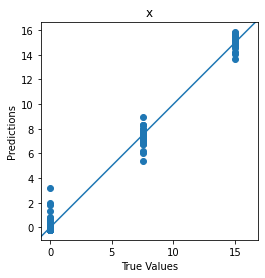

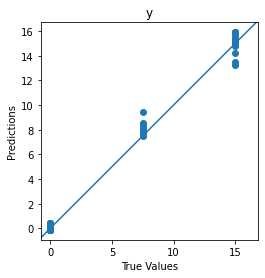

In [84]:
# Run predict
Y_pred = model.predict(norm_test_X)
price_pred = Y_pred[0]
ptratio_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='x')
plot_diff(test_Y[1], Y_pred[1], title='y')

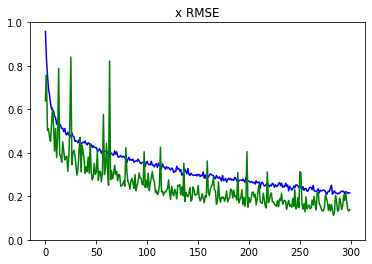

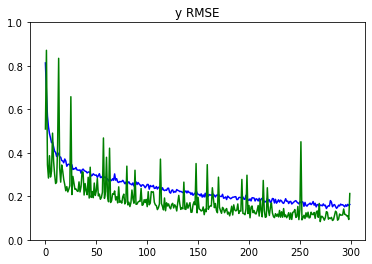

In [85]:
# Plot RMSE
plot_metrics(metric_name='x_output_root_mean_squared_error', title='x RMSE', ylim=1)
plot_metrics(metric_name='y_output_root_mean_squared_error', title='y RMSE', ylim=1)

In [86]:
# Save model
model.save('./xyForcePlate6/', save_format='tf')

INFO:tensorflow:Assets written to: ./xyForcePlate6/assets


In [87]:
# Restore model
loaded_model = tf.keras.models.load_model('./xyForcePlate6/')

In [43]:
dataVal.iloc[:,:4].shape

(40000, 4)

In [44]:
# Run predict with restored model
predictions = loaded_model.predict(dataVal.iloc[:,:4])
x_pred = predictions[0]
y_pred = predictions[1]

In [57]:
norm_test_X.shape

(50000, 4)

In [53]:
norm_test_X[0]

array([ 1.02478891, -0.37257721,  0.63687956,  0.94191688])

In [46]:
print(x_pred)

[[ -42.01431 ]
 [  29.233204]
 [-194.94339 ]
 ...
 [ -59.731293]
 [  11.876278]
 [ -15.666477]]


In [47]:
print(dataVal.iloc[:,:4])

         F0   F1   F2   F3
68708   380  249  330  524
99414   329  254  364  461
149362  268  300  304  567
221717  336  330  330  525
96658   317  249  359  455
...     ...  ...  ...  ...
80692   389  228  367  519
39978   286  292  301  486
155390  343  247  330  520
188289  392  372  357  533
219339  404  277  326  510

[40000 rows x 4 columns]


################################################################################